In [2]:
import numpy as np

In [3]:
environment_rows = 11
environment_columns = 11

In [4]:
q_values = np.zeros((environment_rows, environment_columns, 4))
#4 represents the number of values the agent can take up in each grid

In [5]:
actions = ['up', 'right', 'down', 'left']

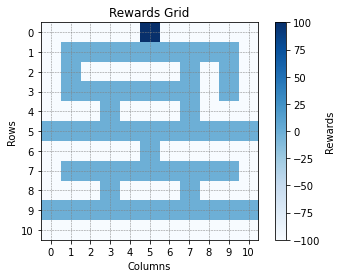

In [6]:
import matplotlib.pyplot as plt
rewards = np.full((environment_rows, environment_columns), -100.)
#creates a grid and fills it with -100
rewards[0, 5] = 100. #set the reward for the packaging area (i.e., the goal) to 100

#define aisle locations (i.e., white squares) for rows 1 through 9
aisles = {} #store locations in a dictionary
aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 7, 9]
aisles[3] = [i for i in range(1, 8)]
aisles[3].append(9)
aisles[4] = [3, 7]
aisles[5] = [i for i in range(11)]
aisles[6] = [5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(11)]

#set the rewards for all aisle locations (i.e., white squares)
for row_index in range(1, 10):
    for column_index in aisles[row_index]:
        rewards[row_index, column_index] = -1.
  #print rewards matrix
plt.imshow(rewards, cmap='Blues')
plt.colorbar(label='Rewards')
plt.title('Rewards Grid')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(np.arange(environment_columns))
plt.yticks(np.arange(environment_rows))
plt.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

In [7]:
def is_terminal_state(current_row_index, current_column_index):
  #if the reward for this location is -1, then it is not a terminal state (i.e., it is a 'white square')
  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True
#this function shows weather a sepecif location is terminal or not if not it return False else true

In [8]:
def get_starting_location():
  #get a random row and column index
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_columns)
  #continue choosing random row and column indexes until a non-terminal state is identified
  #(i.e., until the chosen state is a 'white square').
    while is_terminal_state(current_row_index, current_column_index):
        current_row_index = np.random.randint(environment_rows)
        current_column_index = np.random.randint(environment_columns)
    return current_row_index, current_column_index
#this function chooses a random non terminal starting location 

In [9]:
def get_next_action(current_row_index, current_column_index, epsilon):
  #if a randomly chosen value between 0 and 1 is less than epsilon, 
  #then choose the most promising value from the Q-table for this state.
    if np.random.random() < epsilon:
        return np.argmax(q_values[current_row_index, current_column_index])
    else: #choose a random action
        return np.random.randint(4)

In [10]:
def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index = current_row_index
    new_column_index = current_column_index
    if actions[action_index] == 'up' and current_row_index > 0:
        new_row_index -= 1
    elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
        new_column_index += 1
    elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
        new_row_index += 1
    elif actions[action_index] == 'left' and current_column_index > 0:
        new_column_index -= 1
    return new_row_index, new_column_index

In [14]:
def get_shortest_path(start_row_index, start_column_index):
  #return immediately if this is an invalid starting location
    if is_terminal_state(start_row_index, start_column_index):
        return []
    else: #if this is a 'legal' starting location
        current_row_index, current_column_index = start_row_index, start_column_index
        shortest_path = []
        shortest_path.append([current_row_index, current_column_index])
    #continue moving along the path until we reach the goal (i.e., the item packaging location)
    while not is_terminal_state(current_row_index, current_column_index):
      #get the best action to take
        action_index = get_next_action(current_row_index, current_column_index, 1.)
      #move to the next location on the path, and add the new location to the list
        current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
        shortest_path.append([current_row_index, current_column_index])
    return shortest_path

In [15]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn

#run through 1000 training episodes
for episode in range(1000):
    #get the starting location for this episode
    row_index, column_index = get_starting_location()

    #continue taking actions (i.e., moving) until we reach a terminal state
    #(i.e., until we reach the item packaging area or crash into an item storage location)
    while not is_terminal_state(row_index, column_index):
        #choose which action to take (i.e., where to move next)
        action_index = get_next_action(row_index, column_index, epsilon)

        #perform the chosen action, and transition to the next state (i.e., move to the next location)
        old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
        row_index, column_index = get_next_location(row_index, column_index, action_index)

        #receive the reward for moving to the new state, and calculate the temporal difference
        reward = rewards[row_index, column_index]
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

        #update the Q-value for the previous state and action pair
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_row_index, old_column_index, action_index] = new_q_value

print('Training complete!')

Training complete!


In [16]:
print(get_shortest_path(3, 9)) #starting at row 3, column 9
#print(get_shortest_path(5, 0)) #starting at row 5, column 0
#print(get_shortest_path(9, 5)) #starting at row 9, column 5

[[3, 9], [2, 9], [1, 9], [1, 8], [1, 7], [1, 6], [1, 5], [0, 5]]


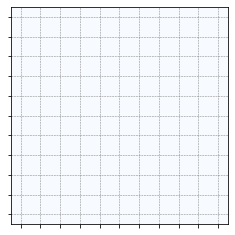

In [18]:
import matplotlib.pyplot as plt

# Define the dimensions of the grid
GRID_WIDTH = 11
GRID_HEIGHT = 11

# Function to visualize the grid and shortest path
def visualize_shortest_path(path):
    # Create a grid of zeros
    grid = [[0] * GRID_WIDTH for _ in range(GRID_HEIGHT)]

    # Set cells in the path to 1
    for row, col in path:
        grid[row][col] = 1

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot the grid
    ax.imshow(grid, cmap='Blues')

    # Customize the tick labels and grid lines
    ax.set_xticks(range(GRID_WIDTH))
    ax.set_yticks(range(GRID_HEIGHT))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')

    # Highlight the cells in the shortest path
    for row, col in path:
        ax.text(col, row, '*', color='red', ha='center', va='center', fontsize=16, fontweight='bold')

    # Show the plot
    plt.show()

# Example usage
shortest_path = get_shortest_path(3,8)
visualize_shortest_path(shortest_path)
